In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import sem
import matplotlib.font_manager


data = pd.read_csv('../Prepared_Data/data.csv')

In [2]:
##### Set the Plot Sheme #####
import tueplots
from tueplots import bundles

# this provides the color palette of Uni Tuebingen
from tueplots.constants.color import rgb
# e.g. as rgb.tue_blue, rgb.tue_red, etc.

# set plotting stylesheet
plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))
# viridis

In [3]:
##### Cluster data #####

# remove rows that have values missing
data = data.dropna()

# select relevant columns for clustering
columns_for_clustering = ['number_of_parts', 'minifig_quantitiy', 'number_of_colors',
                           'number_of_categories', 'number_of_unique_parts',
                           'number_of_different_parts', 'not_unique_parts',
                           'proportion_unique_to_not_unique']

# extract the selected columns for clustering
data_for_clustering = data[columns_for_clustering]

# impute missing values using mean strategy
#imputer = SimpleImputer(strategy='mean')
#data_for_clustering_imputed = imputer.fit_transform(data_for_clustering)

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# determine the optimal number of clusters using the elbow method
wcss = []  # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

c:\users\edwar\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\users\edwar\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\users\edwar\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\users\edwar\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


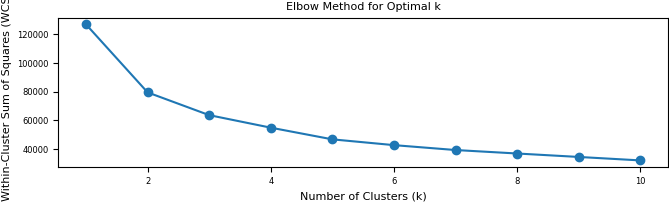

c:\users\edwar\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\edwar\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


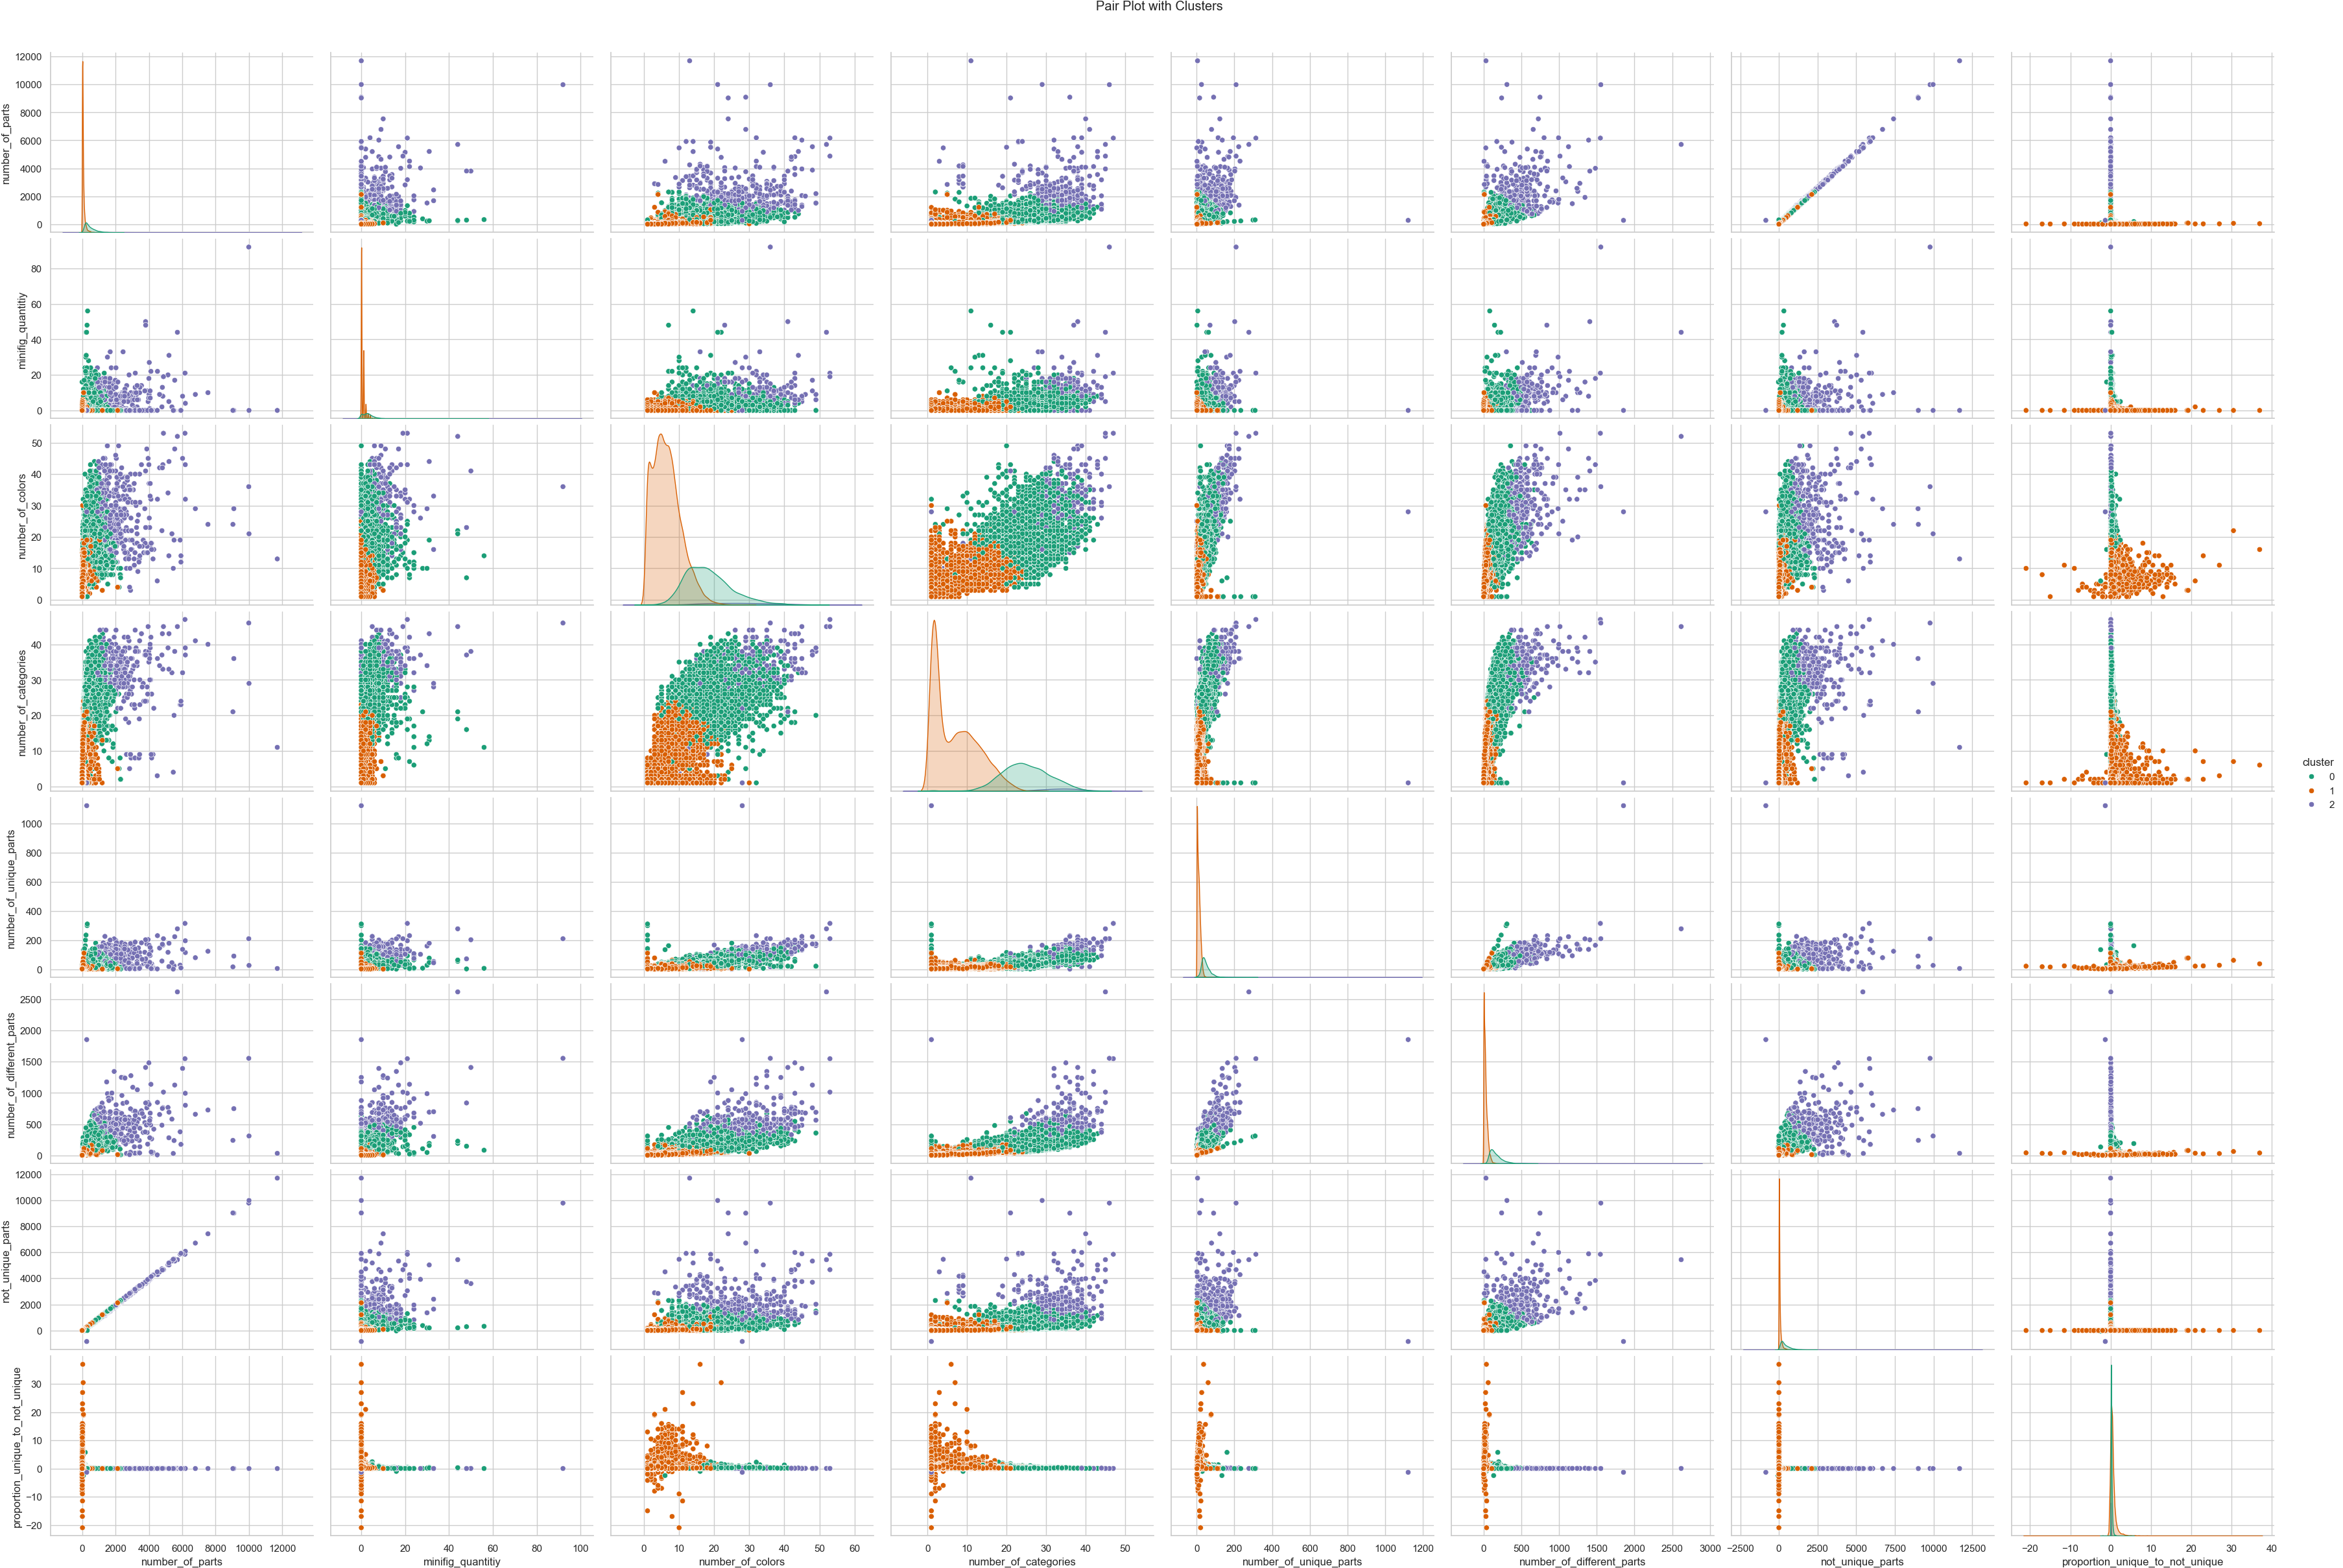

In [4]:
##### Plot the elbow method graph #####

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Based on the elbow method, choose the optimal number of clusters
optimal_k = 3  
# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
data['cluster'] = clusters

# Visualize the clusters using a pair plot
sns.set(style="whitegrid")
sns.pairplot(data, hue='cluster', palette='Dark2', vars=columns_for_clustering, height=3, aspect=1.5)
plt.suptitle('Pair Plot with Clusters', y=1.02)
plt.show()

In [5]:
##### Print means of different factors in the clusters #####

# select only numeric columns for aggregation
numeric_columns = ['number_of_parts', 'minifig_quantitiy', 'number_of_colors',
                    'number_of_categories', 'number_of_unique_parts',
                    'number_of_different_parts', 'not_unique_parts',
                    'proportion_unique_to_not_unique']

# ensure numeric columns have the correct data types (convert if necessary)
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')


# group by cluster and calculate mean for numeric columns
cluster_means = data.groupby('cluster')[numeric_columns].mean()
cluster_sems = data.groupby('cluster')[numeric_columns].apply(lambda x: sem(x, axis=None))

# display the cluster means
print(cluster_means)
print(cluster_sems)

         number_of_parts  minifig_quantitiy  number_of_colors  \
cluster                                                         
0             464.408022           3.288933         18.262936   
1              64.939615           0.517967          6.509789   
2            2526.911854           7.346505         27.562310   

         number_of_categories  number_of_unique_parts  \
cluster                                                 
0                   24.770735               47.651399   
1                    7.055425               10.655181   
2                   32.164134               97.519757   

         number_of_different_parts  not_unique_parts  \
cluster                                                
0                       161.019312        416.756623   
1                        25.525189         54.284434   
2                       513.349544       2429.392097   

         proportion_unique_to_not_unique  
cluster                                   
0                    

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


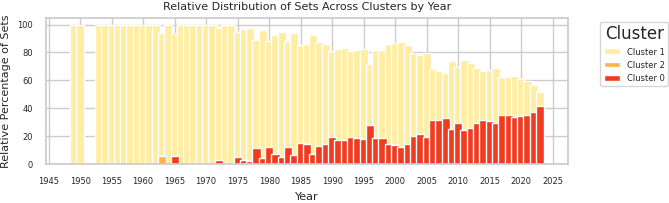

In [26]:

##### Plot the relative percentage of sets in each cluster for every year #####
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
cluster_year_counts = data.groupby(['year', 'cluster']).size().reset_index(name='set_count')

# calculate the relative percentage of sets in each cluster for every year
cluster_year_counts['relative_percentage'] = (
    cluster_year_counts.groupby('year')['set_count'].transform(lambda x: x / x.sum()) * 100
)

# Assuming 'cluster_year_counts' contains your data
colors = ['#ffeda0', '#feb24c', '#f03b20']

# Create a pivot table for easy plotting
pivot_table = cluster_year_counts.pivot(index='year', columns='cluster', values='relative_percentage')

plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))

fig, ax = plt.subplots()

# Plot stacked bars
for cluster, color in zip(cluster_year_counts['cluster'].unique(), colors):
    ax.bar(pivot_table.index, pivot_table[cluster], label=f'Cluster {cluster}', color=color, width=1.3)

ax.set_title('Relative Distribution of Sets Across Clusters by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Relative Percentage of Sets')
ax.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.2, 1))

# Set major x-axis ticks every 5 years
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# Add minor x-axis ticks every 1 year
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.minorticks_on()

plt.savefig('cluster.pdf')
plt.show()


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


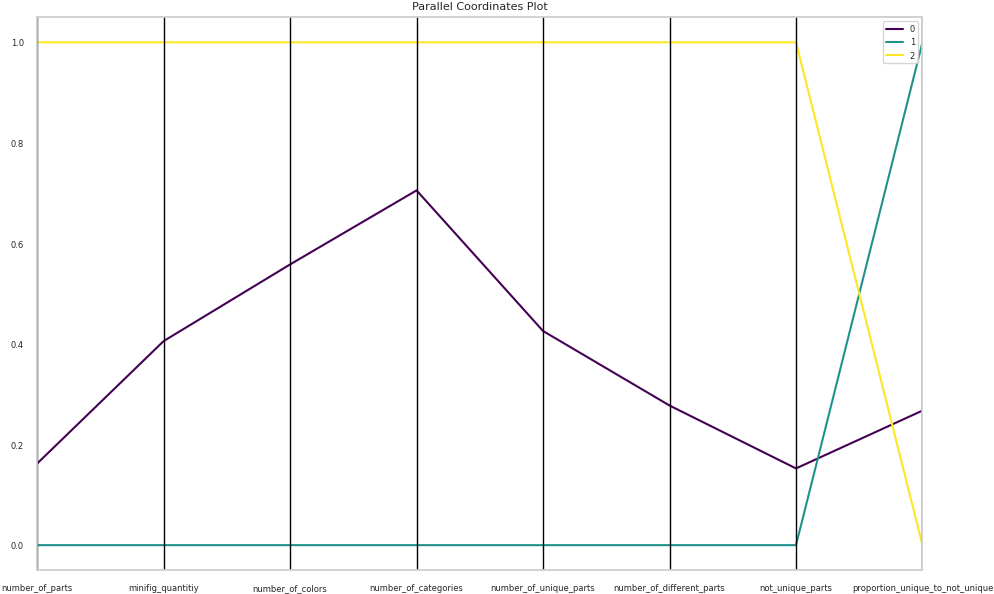

In [8]:
# Your cluster results

from pandas.plotting import parallel_coordinates

# Assuming your DataFrame is named 'cluster_means'
plt.figure(figsize=(10, 6))

# Normalize the data for better visualization
normalized_df = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Add the cluster information to the DataFrame as a new column
normalized_df['cluster'] = normalized_df.index

# Plot parallel coordinates using the index as clusters
parallel_coordinates(normalized_df, class_column='cluster', colormap='viridis')

plt.title('Parallel Coordinates Plot')
plt.show()



 


